In [1]:
from nilearn import surface, plotting

import os.path as op

from tms_risk.utils.data import Subject

In [1]:
sub = Subject(1)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_52587/2703932161.py", line 1, in <module>
    sub = Subject(1)
NameError: name 'Subject' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1012, in structured_traceback
    return VerboseTB.structured_traceback(
  Fil

In [3]:
pars = sub.get_prf_parameters_surf(1, smoothed=True, space='fsnative', nilearn=True)

In [4]:
pars.loc['L'].shape

(128409, 4)

In [5]:
surfinfo = sub.get_surf_info()

In [8]:
surface.load_surf_data(surfinfo['L']['inner'])[0].shape

(152454, 3)

In [7]:
plotting.view_surf(surfinfo['L']['inflated'], pars.loc['L', 'cvr2'].values)

ValueError: Mismatch between number of nodes in mesh (152454) and size of surface data (128409)

In [4]:
ofrom tms_risk.utils.data import get_tms_subjects

In [7]:
' '.join([f'{ix:02d}' for ix in get_tms_subjects()])

'01 02 03 04 05 06 07 09 10 11 18 19 21 25 26 29 30 31 34 35 36 37 45 46 47 50 53 56 59 62 63 67 69 72 74'

In [2]:
bids_folder = '/data/ds-tmsrisk'

In [3]:
from tms_risk.utils.data import Subject
from nilearn.input_data import NiftiMasker
subject = 1
sub = Subject(subject)

sub.get_surf_info()

/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


{'L': {'inner': '/data/ds-tmsrisk/derivatives/fmriprep/sub-01/ses-1/anat/sub-01_ses-1_hemi-L_smoothwm.surf.gii',
  'mid': '/data/ds-tmsrisk/derivatives/fmriprep/sub-01/ses-1/anat/sub-01_ses-1_hemi-L_midthickness.surf.gii',
  'outer': '/data/ds-tmsrisk/derivatives/fmriprep/sub-01/ses-1/anat/sub-01_ses-1_hemi-L_pial.surf.gii',
  'inflated': '/data/ds-tmsrisk/derivatives/fmriprep/sub-01/ses-1/anat/sub-01_ses-1_hemi-L_inflated.surf.gii',
  'curvature': '/data/ds-tmsrisk/derivatives/freesurfer/sub-01/surf/lh.curv'},
 'R': {'inner': '/data/ds-tmsrisk/derivatives/fmriprep/sub-01/ses-1/anat/sub-01_ses-1_hemi-R_smoothwm.surf.gii',
  'mid': '/data/ds-tmsrisk/derivatives/fmriprep/sub-01/ses-1/anat/sub-01_ses-1_hemi-R_midthickness.surf.gii',
  'outer': '/data/ds-tmsrisk/derivatives/fmriprep/sub-01/ses-1/anat/sub-01_ses-1_hemi-R_pial.surf.gii',
  'inflated': '/data/ds-tmsrisk/derivatives/fmriprep/sub-01/ses-1/anat/sub-01_ses-1_hemi-R_inflated.surf.gii',
  'curvature': '/data/ds-tmsrisk/derivatives/

In [ ]:
subject = 2
hemi = "L"
hemi_fs = 'lh'
inner_mesh = op.join(bids_folder, 'derivatives','fmriprep', f'sub-{subject:02d}', 'ses-1', 'anat', f'sub-{subject:02d}_ses-1_hemi-{hemi}_smoothwm.surf.gii')
outer_mesh = op.join(bids_folder, 'derivatives','fmriprep', f'sub-{subject:02d}', 'ses-1', 'anat', f'sub-{subject:02d}_ses-1_hemi-{hemi}_pial.surf.gii')
inflated_mesh = op.join(bids_folder, 'derivatives','fmriprep', f'sub-{subject:02d}', 'ses-1', 'anat', f'sub-{subject:02d}_ses-1_hemi-{hemi}_inflated.surf.gii')
curvature = surface.load_surf_data(op.join(bids_folder, 'derivatives', 'freesurfer', f'sub-{subject:02d}', 'surf', f'{hemi_fs}.curv'))
curvature_thr = (curvature > 0.).astype(float)

# surface.load_surf_data(inner_mesh)
plotting.view_surf(inner_mesh, curvature_thr, cmap='gray')


In [57]:
pars = sub.get_prf_parameters_volume(1, None, True, False, True, False, False, True, return_image=True)

In [58]:
pars_surf = surface.vol_to_surf(pars, inner_mesh, inner_mesh=inner_mesh)

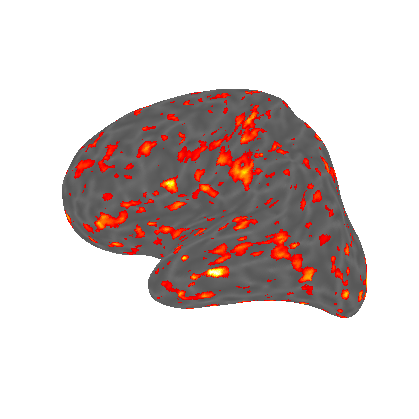

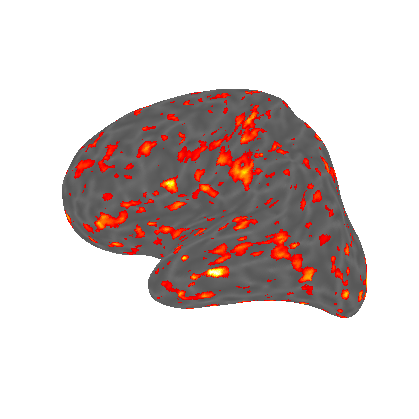

In [59]:
plotting.plot_surf(inflated_mesh, pars_surf[:, 4], threshold=0.05, bg_map=curvature, cmap='hot')

In [36]:
from nilearn import datasets
big_fsaverage = datasets.fetch_surf_fsaverage('fsaverage')


Dataset created in /Users/gdehol/nilearn_data/fsaverage



 ...done. (2 seconds, 0 min)
Extracting data from /Users/gdehol/nilearn_data/fsaverage/5592d63c5c8039b4f902396c128dcd85/download..... done.


In [42]:
import numpy as np
np.std(surface.load_surf_data(big_fsaverage.sulc_right))

0.5924748

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_73578/2883576392.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(surface.load_surf_data(big_fsaverage.sulc_right))
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_73578/2883576392.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

<Axes: ylabel='Density'>

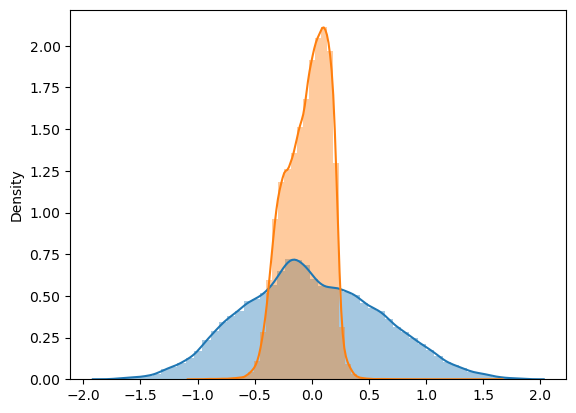

In [41]:
import seaborn as sns
sns.distplot(surface.load_surf_data(big_fsaverage.sulc_right))
sns.distplot(curvature)

In [20]:
from nilearn import image

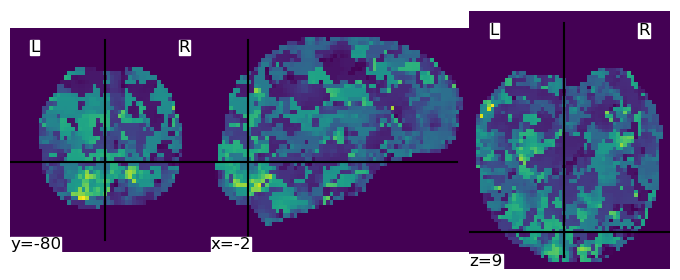

In [21]:
plotting.plot_img(image.index_img(masker.inverse_transform(pars.T), 0))

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_64694/818789462.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(curvature)


<Axes: ylabel='Density'>

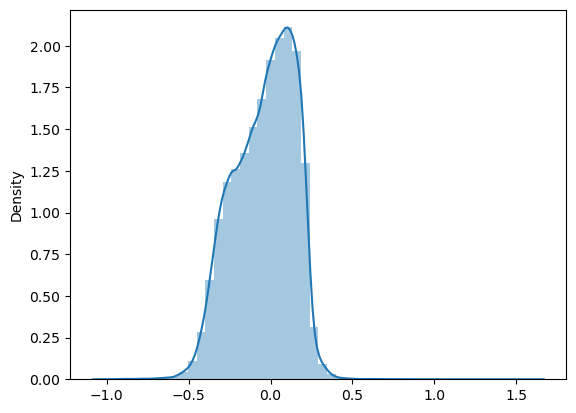

In [23]:
import seaborn as sns
sns.distplot(curvature)

In [19]:
curvature

'/data/ds-tmsrisk/derivatives/freesurfer/sub-01/surf/lh.curv'